# Assignment Objectives

In [ ]:
#Provide a visualized summary of the sentiments expressed in Tweets sent out by the following LoL organizations: 
#CLG, Clutch Gaming, C9, Echo Fox, FlyQuest, Golden Guardians, Optic Gaming, Team Liquid, TSM, 100 Thieves.

#Import tweepy, pandas, matplotlib, seaborn, textblob, vader

#First plot will:
    #be a scatter plot of sentiments of last 100 tweets
    #Ranging from -1.0 to 1.0
    #Scores of 0 is neutral sentiment
    # -1 most negative sentiment
    # +1 most positive sentiment
    #Each plot point will reflect the compound sentiment of a tweet
    #Sort each plot by a relative timestamp

#Second plot will:
    #be a bar plot visualizing OVERALL sentiments of last 100 tweets per org.
    # Aggregate using VADER

#Final must:
    # Pull last 100 tweets per outlet
    #Perform sentiment analysis: Compound, Positive, Neutral, Negative score per tweet
    #Pull into a DataFrame the tweet's source account, it's text, date, sentiment scores
    #Export the data from DataFrame into a CSV File
    #Save png images per plot

#Final Considerations:
    #ADC Apollo was not retrievable for Sentiment Analysis
    #Zig and LemonNation Removed from Team
    #Use Matplotlib & Seaborn libraries
    #Include a description of 3 observable trends
    #Proper labeling of plots (titles, with date of analysis) and axes lables
    #Exported markdown version of notebook called README.md in GitHub

# Dependencies/Api Retrieval

In [3]:
#Dependencies

import pandas as pd
import matplotlib.pyplot as plt
import tweepy
import json
import numpy as np
from pprint import pprint
import datetime as dt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
analyzer = SentimentIntensityAnalyzer()

In [4]:
# Twitter API Keys
consumer_key = "vbtDKBb6MLz1UDuXqjulinZWP"
consumer_secret = "porfKt9UTtSp2XRYfqT7W5CaLAsgTFgXAgsjFYaAyxc42asmnw"
access_token = "2503131714-U09cIrTKKguHgX4tLYxSIWFKqkpM3FCpko8huUm"
access_token_secret = "QT9zEyQXvVzObM46BrIsx9kgqnwmZmhUjtNhafPU3iGcB"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Target User Skeleton

In [193]:
#Target User Accounts
#CLG, Clutch Gaming, C9, Echo Fox, FlyQuest, Golden Guardians, Optic Gaming, Team Liquid, TSM, 100 Thieves.
clg_list = ("@DarshanU", "@CLGReignover", "@Huhi", "@Stixxay", "@Biofrostlol")
#Removed Apollo from Sentiment Analysis; page couldn't be found
cg_list = ("@CG_Solo", "@LirA_CG", "@CG_Febiven", "@CG_Apollo", "@CG_Hakuho")
c9_list = ("@Licorice", "@C9Svenskeren", "@Jensen", "@Sneaky", "@Smoothie")
ef_list = ("@Huni", "@Dardochlol", "@Midfenix", "@AltecLoL", "@AdrianMaLOL")
fq_list = ("@FlameKR", "@AnDa0803", "@aroomanii", "@WildTurtle", "@stuntopolis")
gg_list = ("@Lourlo", "@Contractz", "@Hai", "@deftlylol", "@GGS_Matt")
#Zig and LemonNation removed from team
og_list = ("@zigL0L", "@Akaadian", "@PowerOfEvilLoL", "@ArrowDongTak", "@LemonNation")
tl_list = ("@Impact", "@Xmithie", "@Pobelter", "@TLDoublelift", "@TLOlleh")
tsm_list = ("@lolHauntzer", "@TSMTheOddOne", "@Bjergsen", "@LoLZven", "@mithytsm")
oht_list = ("@ssumday22", "@MeteosLoL", "@RyuL0L", "@Cody_Sun1", "@aphromoo")
#Assign Variables to hold sentiments for analysis
source_list = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
tweet_list = []
dates_list = []
sentiments_dict = []
counter = 1

#Create a loop through all parts of user_list
for user in clg_list:
    #Create a loop that evaulates 100 tweets (5 pages)
    for x in range(5):

        #Get all tweets from their home feed
        public_tweets = api.user_timeline(user)
        
        #Loop through all the tweets
        for tweet in public_tweets:
            #Use vader analysis for each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            twe = tweet["text"]
            dte = tweet["created_at"]
            tweets_ago = counter
    #Add each sentiment value to the corresponding list:
            source_list.append(user)
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            tweet_list.append(twe)
            dates_list.append(dte)
            
            
            #Append vader sentiment dict
            sentiments_dict.append({"Account": user,
                          "Created Date": dte,
                          #"Date": tweet["created_at"], 
                          "Compound": compound,
                          "Positive": pos,
                          "Negative": neg,
                          "Neutral": neu,
                          "Tweets Ago": tweets_ago,
                          "Tweet Text": twe})
            #Insert coutmter
            counter = counter + 1
    #Add each sentiment value to the corresponding list:
    # compound_list.append(compound)
    # positive_list.append(pos)
    # negative_list.append(neg)
    # neutral_list.append(neu)
    # tweet_list.append(twe)
    # dates_list.append(dte)

    #Print the averages
    print("Sentiment Scores")
    print("---------------------------")
    # pprint(bbc_tweets)
    print("User: %s" % user)
    print("Compound Score: %s" % np.mean(compound_list))
    print("Positive Score: %s" % np.mean(positive_list))
    print("Neutral Score: %s" % np.mean(neutral_list))
    print("Negative Score: %s" % np.mean(negative_list))
    print("---------------------------")
    print("End of Scores")
    print("---------------------------")



Sentiment Scores
---------------------------
User: @DarshanU
Compound Score: 0.228215
Positive Score: 0.1833
Neutral Score: 0.73675
Negative Score: 0.08005
---------------------------
End of Scores
---------------------------
Sentiment Scores
---------------------------
User: @CLGReignover
Compound Score: 0.2729975
Positive Score: 0.229975
Neutral Score: 0.709625
Negative Score: 0.060475
---------------------------
End of Scores
---------------------------
Sentiment Scores
---------------------------
User: @Huhi
Compound Score: 0.284098333333
Positive Score: 0.213616666667
Neutral Score: 0.70765
Negative Score: 0.0621333333333
---------------------------
End of Scores
---------------------------
Sentiment Scores
---------------------------
User: @Stixxay
Compound Score: 0.23498875
Positive Score: 0.1982
Neutral Score: 0.7231125
Negative Score: 0.0662625
---------------------------
End of Scores
---------------------------
Sentiment Scores
---------------------------
User: @Biofrostlol


# Network Twitter Sentiments DataFrame

In [194]:
user_df = pd.DataFrame(sentiments_dict)
user_df.head()
#Export to csv
user_df.to_csv("CLG_Sentiments.csv")

In [195]:
clg_list = ("@DarshanU", "@CLGReignover", "@Huhi", "@Stixxay", "@Biofrostlol")
cg_list = ("@CG_Solo", "@LirA_CG", "@CG_Febiven", "@CG_Apollo", "@CG_Hakuho")
c9_list = ("@Licorice", "@C9Svenskeren", "@Jensen", "@Sneaky", "@Smoothie")
ef_list = ("@Huni", "@Dardochlol", "@Midfenix", "@AltecLoL", "@AdrianMaLOL")
fq_list = ("@FlameKR", "@AnDa0803", "@aroomanii", "@WildTurtle", "@stuntopolis")
gg_list = ("@Lourlo", "@Contractz", "@Hai", "@deftlylol", "@GGS_Matt")
og_list = ("@zigL0L", "@Akaadian", "@PowerOfEvilLoL", "@ArrowDongTak", "@LemonNation")
tl_list = ("@Impact", "@Xmithie", "@Pobelter", "@TLDoublelift", "@TLOlleh")
tsm_list = ("@lolHauntzer", "@TSMTheOddOne", "@Bjergsen", "@LoLZven", "@mithytsm")
oht_list = ("@ssumday22", "@MeteosLoL", "@RyuL0L", "@Cody_Sun1", "@aphromoo")
#Separate each list item into a separate df

#Top
top_df = user_df[user_df["Account"] == "@DarshanU"]
#JGL
jgl_df = user_df[user_df["Account"] == "@CLGReignover"]
#MID
mid_df = user_df[user_df["Account"] == "@Huhi"]
#ADC
adc_df = user_df[user_df["Account"] == "@Stixxay"]
#SUP
sup_df = user_df[user_df["Account"] == "@Biofrostlol"]
#Print Statements of Media DF
print(top_df.head())
print("-" * 80)
print(jgl_df.head())
print("-" * 80)
print(mid_df.head())
print("-" * 80)
print(adc_df.head())
print("-" * 80)
print(sup_df.head())
print("-" * 80)

     Account  Compound                    Created Date  Negative  Neutral  \
0  @DarshanU    0.4753  Wed Apr 18 23:20:55 +0000 2018     0.000    0.660   
1  @DarshanU    0.0000  Tue Apr 17 18:10:38 +0000 2018     0.000    1.000   
2  @DarshanU    0.0000  Tue Apr 17 16:47:40 +0000 2018     0.000    1.000   
3  @DarshanU    0.2006  Tue Apr 17 03:37:38 +0000 2018     0.081    0.807   
4  @DarshanU   -0.6486  Tue Apr 10 21:11:32 +0000 2018     0.261    0.739   

   Positive                                         Tweet Text  Tweets Ago  
0     0.340           @betsuniipls @SFAT Nice to meet you man!           1  
1     0.000  hitting the rift after a short vacay https://t...           2  
2     0.000                                   @aphromoo 1v1 me           3  
3     0.113  Irelia "buffs" on pbe look much more like a ne...           4  
4     0.000  hey guys I missed ya https://t.co/8lgYwMtfyA i...           5  
---------------------------------------------------------------------------

In [196]:
#Formatting Date
dates = dt.date.today
dates = dt.date.today().strftime("%m/%d/%Y")
dates

'04/19/2018'

# Scatter Plot Sentiment
## Plot 1 Company at a Time (5 Plots) Before combining
### Refer to Citipy Scatter plot

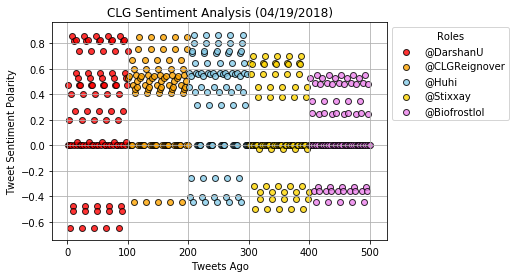

In [197]:
#Bubble Plot
plt.scatter(x=top_df["Tweets Ago"],
            y=top_df["Compound"],
            facecolors="red",
            edgecolor="black", 
            linewidth=1, 
            marker='o',
            alpha=0.8,
            label="Top")

plt.scatter(x=jgl_df["Tweets Ago"],
            y=jgl_df["Compound"],
            facecolors="orange",
            edgecolor="black", 
            linewidth=1, 
            marker='o',
            alpha=0.8,
            label="Jgl")

plt.scatter(x=mid_df["Tweets Ago"],
            y=mid_df["Compound"], 
            facecolors="skyblue",
            edgecolor="black", 
            linewidth=1, 
            marker='o',
            alpha=0.8, 
            label="Mid")

plt.scatter(x=adc_df["Tweets Ago"],
            y=adc_df["Compound"], 
            facecolors="gold",
            edgecolor="black", 
            linewidth=1, 
            marker='o',
            alpha=0.8,
            label="Adc")

plt.scatter(x=sup_df["Tweets Ago"],
            y=sup_df["Compound"],
            facecolors="violet",
            edgecolor="black", 
            linewidth=1, 
            marker='o',
            alpha=0.8, 
            label="Sup")

clg_list = ("@DarshanU", "@CLGReignover", "@Huhi", "@Stixxay", "@Biofrostlol")
cg_list = ("@CG_Solo", "@LirA_CG", "@CG_Febiven", "@CG_Apollo", "@CG_Hakuho")
c9_list = ("@Licorice", "@C9Svenskeren", "@Jensen", "@Sneaky", "@Smoothie")
ef_list = ("@Huni", "@Dardochlol", "@Midfenix", "@AltecLoL", "@AdrianMaLOL")
fq_list = ("@FlameKR", "@AnDa0803", "@aroomanii", "@WildTurtle", "@stuntopolis")
gg_list = ("@Lourlo", "@Contractz", "@Hai", "@deftlylol", "@GGS_Matt")
og_list = ("@zigL0L", "@Akaadian", "@PowerOfEvilLoL", "@ArrowDongTak", "@LemonNation")
tl_list = ("@Impact", "@Xmithie", "@Pobelter", "@TLDoublelift", "@TLOlleh")
tsm_list = ("@lolHauntzer", "@TSMTheOddOne", "@Bjergsen", "@LoLZven", "@mithytsm")
oht_list = ("@ssumday22", "@MeteosLoL", "@RyuL0L", "@Cody_Sun1", "@aphromoo")
#Scatter Properties
plt.title("CLG Sentiment Analysis ("+ dates + ")")
plt.ylabel("Tweet Sentiment Polarity")
plt.xlabel("Tweets Ago")
#Create a Legend

plt.legend(("@DarshanU", "@CLGReignover", "@Huhi", "@Stixxay", "@Biofrostlol"), 
           numpoints=1, loc="upper right", ncol=1, fontsize=8,
           title="Roles", fancybox=True)
#Have legend adjacent to plot
legn = plt.legend(("@DarshanU", "@CLGReignover", "@Huhi", "@Stixxay", "@Biofrostlol"), 
                  bbox_to_anchor =(1,1), title="Roles")
plt.savefig("CLG_scatter_plot.png")
plt.grid()
plt.show()


# Bar Graph of Overall Sentiments

In [198]:
#Second plot will:
    #be a bar plot visualizing OVERALL sentiments of last 100 tweets per org.
    # Aggregate using VADER
avg_score = round(user_df.groupby(["Account"]).mean()["Compound"],2)
avgSent_df = pd.DataFrame(avg_score)
avg_score.head()

Account
@Biofrostlol     0.07
@CLGReignover    0.32
@DarshanU        0.23
@Huhi            0.31
@Stixxay         0.09
Name: Compound, dtype: float64

In [199]:
#Set value for x-axis and tick_locations
x_axis = np.arange(len(avg_score))
xlabels = avg_score.index
# tick_locations = [value + 0.4 for value in x_axis]
count=0
#Loop for ploting average scores
for sentiment in avg_score:
    plt.text(count, compound + 0.1, str(round(compound,2)))
    count = count + 1

In [200]:
#List where to write x labels and adjust figure size to fit
plt.bar(x_axis, avg_score, tick_label = xlabels, color= ["red", "orange", "skyblue", "gold", "violet"], align="edge")

<Container object of 5 artists>

In [202]:
#Set X and Y Limits:
plt.xlim(-0.25, len(x_axis))

(-0.25, 5)

In [203]:
#Set Title and Labels
plt.title("CLG Sentiment Analysis (" + dates + ")")
plt.grid()
plt.xlabel("Media Sources")
plt.ylabel("Sentiment Score")

Text(0,0.5,'Sentiment Score')

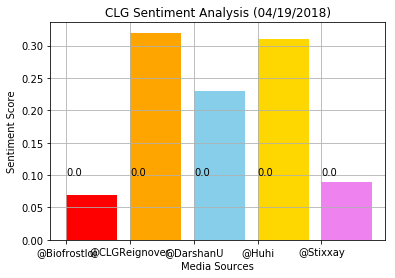

In [204]:
#Save our graph and show
plt.savefig("CLG_Sentiment_Bar_Scores.png")
plt.show()